In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN
4300,ham,Are there TA jobs available? Let me know pleas...,NaN,NaN,NaN
4519,ham,What to think no one saying clearly. Ok leave ...,NaN,NaN,NaN
3620,ham,That means from february to april i'll be gett...,NaN,NaN,NaN
3955,ham,Haha... dont be angry with yourself... Take it...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
# Droping the columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Renaming
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True)

In [11]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Target'] = le.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Missing Values

In [16]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# Duplicates
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

EDA

In [20]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

<AxesSubplot:ylabel='Target'>

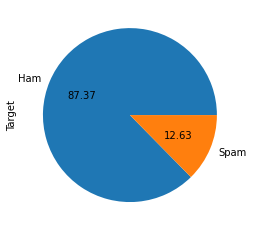

In [21]:
df['Target'].value_counts().plot(kind='pie', labels = ['Ham','Spam'],autopct='%0.2f')

From the above pie chart we can clearly see that the dataset is immbalanced.

In [22]:
# NPL

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Number of characters
df['no_of_characters'] = df['Text'].apply(len)

In [27]:
df

,Target,Text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [28]:
# number of words
df['no_of_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [29]:
df.head()

,Target,Text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['no_of_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,Target,Text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.describe()

,Target,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [33]:
# description of ham messages
df[df['Target']==0][['no_of_characters','no_of_words', 'no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# description of spam messages
df[df['Target']==1][['no_of_characters','no_of_words', 'no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


From analysing the description we can clearly see that, usually ham messages are short and spam messages are long.

<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

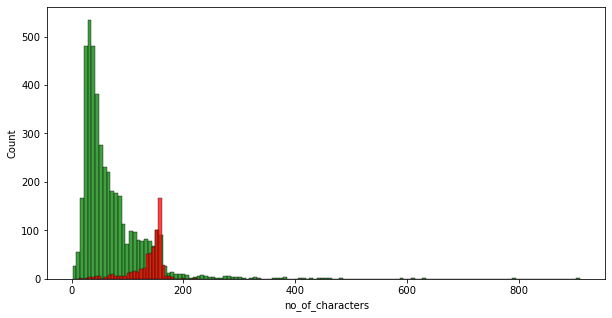

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_characters'],color='Green')
sns.histplot(df[df['Target']==1]['no_of_characters'],color='Red')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

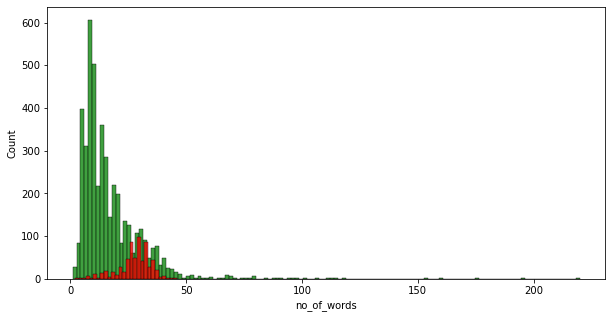

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_words'],color='Green')
sns.histplot(df[df['Target']==1]['no_of_words'],color='Red')

<AxesSubplot:xlabel='no_of_sentences', ylabel='Count'>

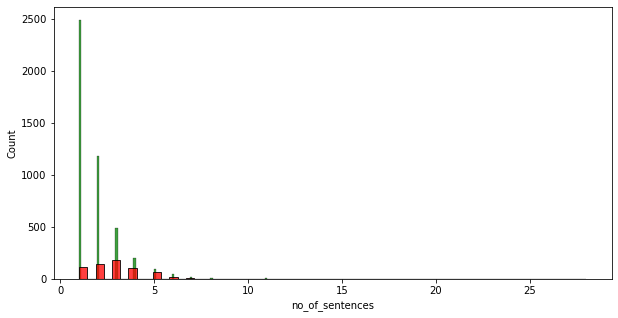

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['no_of_sentences'],color='Green')
sns.histplot(df[df['Target']==1]['no_of_sentences'],color='Red')

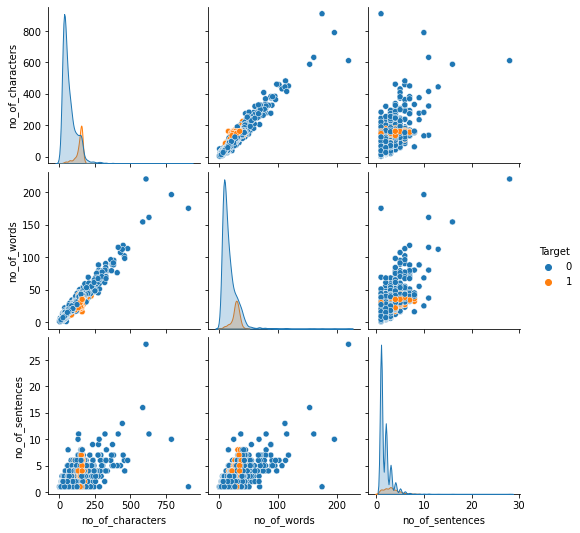

In [38]:
sns.pairplot(df,hue='Target')

There are outliers. 
linear relationship

In [39]:
# correlation

<AxesSubplot:>

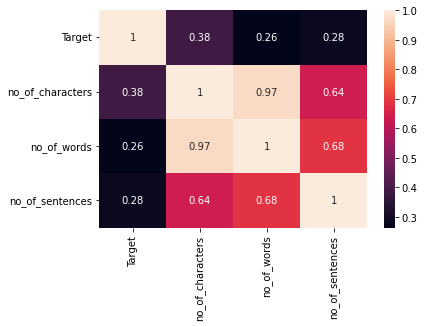

In [40]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing
lower case
tokenizing
remove special characetrs
remove stopwords(un wanted words) and punctuation(special characters) 
stemming

In [41]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
# Lower case convertor
def text_transform (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    test = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [49]:
df['Transformed Text'] = df['Text'].apply(text_transform)

In [50]:
df.head()

,Target,Text,no_of_characters,no_of_words,no_of_sentences,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [51]:
# most repeated words in spam 
filtered_df = df[df['Target'] == 1]

In [52]:
text = ' '.join(filtered_df['Transformed Text'].tolist())

In [53]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)

In [54]:
word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

In [55]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [56]:
for word, count in sorted_words[:30]: 
    print(f'{word}: {count}')

to: 595
a: 330
call: 320
you: 267
your: 252
free: 191
for: 183
the: 183
now: 164
or: 157
2: 155
is: 144
txt: 141
text: 122
from: 122
on: 121
u: 119
ur: 119
have: 116
mobil: 114
and: 104
stop: 104
repli: 103
claim: 98
4: 97
with: 94
prize: 82
thi: 82
of: 81
our: 77


In [57]:
# most repeated words in ham 
filtered_df = df[df['Target'] == 0]

In [58]:
text = ' '.join(filtered_df['Transformed Text'].tolist())

In [59]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)

In [60]:
word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

In [61]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)


In [62]:
for word, count in sorted_words[:30]: 
    print(f'{word}: {count}')

i: 2688
you: 1865
to: 1474
the: 1047
a: 955
u: 883
it: 842
and: 823
in: 753
me: 730
my: 673
is: 656
that: 568
do: 551
have: 481
of: 477
for: 476
so: 412
but: 412
go: 404
are: 397
not: 390
your: 389
on: 371
can: 366
at: 359
be: 354
get: 349
we: 334
will: 314


Data Modeling

For text data Naive Bayes algorithm works best. And we have to convert the test data into numerical or vector form so we use bag of works or tfidf methods.

In [63]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [64]:
x = cv.fit_transform(df['Transformed Text']).toarray()

In [65]:
x.shape

(5169, 6796)

In [66]:
y = df['Target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [72]:
#BernoulliNB
bnb.fit(x_train,y_train)

BernoulliNB()

In [73]:
y_pred1 = bnb.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred1)

0.9748549323017408

In [75]:
confusion_matrix(y_test,y_pred1)

array([[893,   3],
       [ 23, 115]], dtype=int64)

In [76]:
precision_score(y_test,y_pred1)

0.9745762711864406

In [77]:
# GaussianNB
gnb.fit(x_train,y_train)

GaussianNB()

In [78]:
y_pred2 = gnb.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred2)

0.8887814313346228

In [80]:
confusion_matrix(y_test,y_pred2)

array([[801,  95],
       [ 20, 118]], dtype=int64)

In [81]:
precision_score(y_test,y_pred2)

0.5539906103286385

In [82]:
# MultinomialNB 
mnb.fit(x_train,y_train)

MultinomialNB()

In [83]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [84]:
y_pred3 = mnb.predict(x_test)

In [85]:
accuracy_score(y_test,y_pred3)

0.9671179883945842

In [86]:
confusion_matrix(y_test,y_pred3)

array([[874,  22],
       [ 12, 126]], dtype=int64)

In [87]:
precision_score(y_test,y_pred3)

0.8513513513513513

Initialy i havn't assigned the value for max_feature in TfidfVectorizer object at that time i was getting accuracy = 95 and precision = 100
after assigning the value got  accuracy = 96 and precision = 100
max_feature =3000 because this is giving the best accuracy and precision

we considered max_feature to improve the performance of the model.

In [88]:
#Tfidf

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [90]:
x = tfidf.fit_transform(df['Transformed Text']).toarray()


In [91]:
x.shape

(5169, 3000)

In [92]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [94]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [95]:
#BernoulliNB
bnb.fit(x_train,y_train)

BernoulliNB()

In [96]:
y_pred1 = bnb.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred1)

0.9806576402321083

In [98]:
confusion_matrix(y_test,y_pred1)

array([[893,   3],
       [ 17, 121]], dtype=int64)

In [99]:
precision_score(y_test,y_pred1)

0.9758064516129032

In [100]:
# GaussianNB
gnb.fit(x_train,y_train)

GaussianNB()

In [101]:
y_pred2 = gnb.predict(x_test)

In [102]:
accuracy_score(y_test,y_pred2)

0.8771760154738878

In [103]:
confusion_matrix(y_test,y_pred2)

array([[792, 104],
       [ 23, 115]], dtype=int64)

In [104]:
precision_score(y_test,y_pred2)

0.5251141552511416

In [105]:
# MultinomialNB 
mnb.fit(x_train,y_train)

MultinomialNB()

In [106]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [107]:
y_pred3 = mnb.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred3)

0.9680851063829787

In [109]:
confusion_matrix(y_test,y_pred3)

array([[896,   0],
       [ 33, 105]], dtype=int64)

In [110]:
precision_score(y_test,y_pred3)

1.0

In this problem precision score is more important than accuracy sore. and by using TFIDF and MultinomialNB  we are getting more accuracy and precision scores.

In [111]:
# pickel

In [112]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))